In [ ]:
!pip install kaggle

In [ ]:
!pip install kagglehub


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("beekiran/sales-data-analysis")

print("Path to dataset files:", path)

100%|██████████| 3.64M/3.64M [00:00<00:00, 42.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/beekiran/sales-data-analysis/versions/1


In [ ]:
import os
print(os.listdir(path))

['Sales Data.csv']


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv(os.path.join(path,"Sales Data.csv"))

In [ ]:
df.head(3)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18


# Data Info

In [ ]:
df.shape

(185950, 11)

In [ ]:
df.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


In [ ]:
df.dtypes

,0
Unnamed: 0,int64
Order ID,int64
Product,object
Quantity Ordered,int64
Price Each,float64
Order Date,object
Purchase Address,object
Month,int64
Sales,float64
City,object


In [ ]:
df.columns

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

# Data Cleaning

In [ ]:
# Drop Irrelevant Columns
df.drop(columns=['Unnamed: 0'], inplace=True)


In [ ]:
df.rename(columns={"Order ID":"Order_ID",
                   "Product":"Product",
                   "Quantity Ordered":"Quantity_Ordered",
                   "Order Date":"Order_Date",
                   "Purchase Address":"Purchase_Address"},inplace=True)

## Checking Null Values

In [ ]:
df.isnull().sum()

,0
Order_ID,0
Product,0
Quantity_Ordered,0
Price Each,0
Order_Date,0
Purchase_Address,0
Month,0
Sales,0
City,0
Hour,0


# Checking Duplicate Values

In [ ]:
df.duplicated().sum()

264

# Drop Duplicate

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.head(4)

,Order_ID,Product,Quantity_Ordered,Price Each,Order_Date,Purchase_Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15


In [ ]:
df['Month'].unique()

array([12,  1,  4,  5,  2,  3,  8,  9,  6, 11, 10,  7])

In [ ]:
df['City'].unique()

array([' New York City', ' San Francisco', ' Atlanta', ' Portland',
       ' Dallas', ' Los Angeles', ' Boston', ' Austin', ' Seattle'],
      dtype=object)

In [ ]:
sales=df.groupby('City')['Sales'].sum().sort_values(ascending=False)

# Top 5 City


In [ ]:
sales.head(5)

,Sales
City,
San Francisco,8254743.55
Los Angeles,5448304.28
New York City,4661867.14
Boston,3658627.65
Atlanta,2794199.07


In [ ]:
filter=df.groupby('Product')['Sales'].count().sort_values(ascending=False)

# Top 5 Products

In [ ]:
filter.head(5)

,Sales
Product,
USB-C Charging Cable,21859
Lightning Charging Cable,21610
AAA Batteries (4-pack),20612
AA Batteries (4-pack),20558
Wired Headphones,18849


In [ ]:
months=df.groupby('Month')['Sales'].sum().sort_values(ascending=False)


# Top 5 Months of Sales

In [ ]:
months.head(5)

,Sales
Month,
12,4608295.70
10,3734777.86
4,3389217.98
11,3197875.05
5,3150616.23


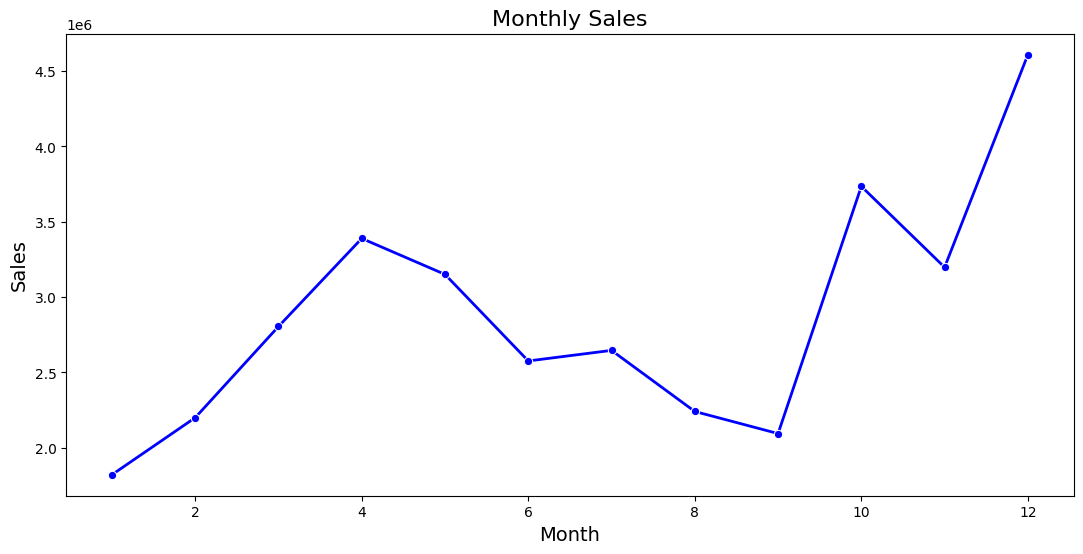

In [ ]:
plt.figure(figsize=(13, 6))
sns.lineplot(x=months.index, y=months.values, marker='o', linewidth=2, color='blue')
plt.title('Monthly Sales', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.show()


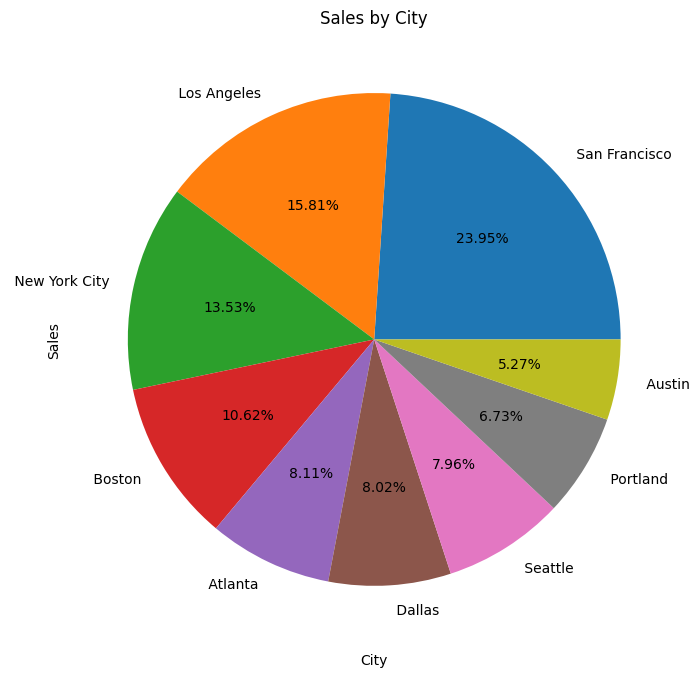

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(sales.values,labels=sales.index,autopct='%1.2f%%')
plt.title('Sales by City')
plt.xlabel('City')
plt.ylabel('Sales')
plt.show()

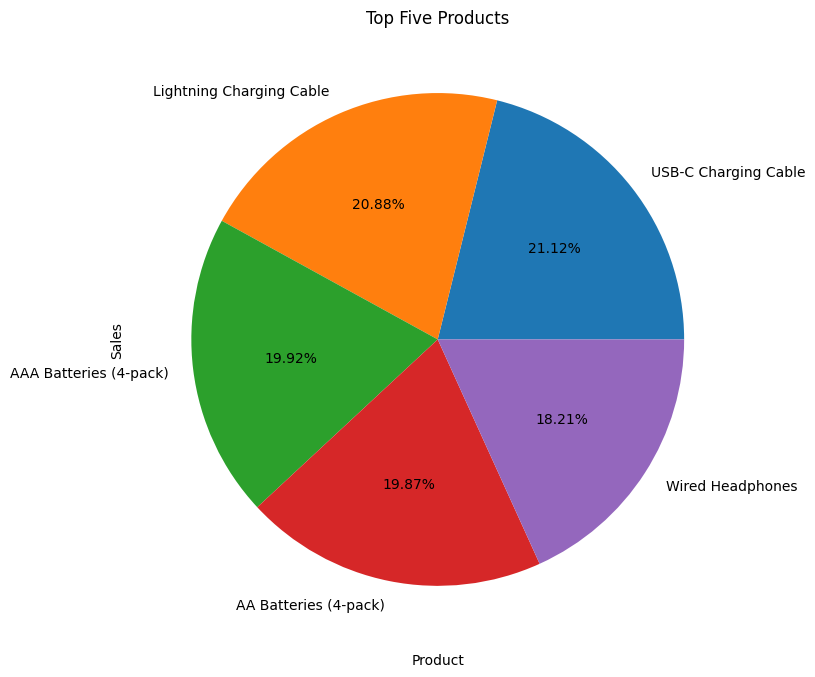

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(filter.values[:5],labels=filter.index[:5],autopct='%1.2f%%')
plt.title('Top Five Products')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.show()